# Research question and objectives

Using internal human resources data from our potential client, we want to **identify the different reasons why certain employees leave** the company (churn). Also, we would like to identify amongst the employees likely to leave, **those that the client should make an effort to keep** (e.g. by offering incentives to stay).

***

# Initial Data Exploration

In this part, we briefly set our goals and give an overview of the data received from the potential client.

***

## 1. Initial data wrangling

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,has_left,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1,0.0,sales,low
5,0.41,0.50,2.0,153.0,3.0,0.0,1,0.0,sales,low
6,0.10,0.77,6.0,247.0,4.0,0.0,1,0.0,sales,low
7,0.92,0.85,5.0,259.0,5.0,0.0,1,0.0,sales,low
8,0.89,1.00,5.0,224.0,5.0,0.0,1,0.0,sales,low
9,0.42,0.53,2.0,142.0,3.0,0.0,1,0.0,sales,low


In [5]:
print(df.department.unique())
print(df.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' nan 'RandD']
['low' 'medium' 'high' nan]


This dataset is composed by the following variables:

* satisfaction_level, [0, 1]
* last_evaluation, [0, 1]
* number_projects, {0, 1, 2, 3,...}
* average_monthly_hours, [0, inf)
* time_spend_company, {0, 1, 2, 3,...}
* work_accident, {0, 1}
* has_left, {0, 1}
* promotion_last_5years, {0, 1}
* department, {'sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT',
 'product_mng', 'marketing', 'RandD'}
* salary, {'low', 'medium', 'high'}

In [6]:
df.shape

(14999, 10)

In [7]:
df_aux = df.dropna(axis=0, how='all') # delete NaN rows
df_aux.shape

(14999, 10)

Usually, at least for big data sets, *df.drop_duplicates()* is also a good choice at the beginning of the data wrangling. However, in this case, it is very likely that several rows contain the same information for different employees.

Moreover, in the case of very big data sets, we may want to consider just a sample of the whole data set for the ease of computations, but the shape of our current data frame won't be an obstacle.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14962 non-null  float64
 1   last_evaluation        14962 non-null  float64
 2   number_projects        14962 non-null  float64
 3   average_monthly_hours  14962 non-null  float64
 4   time_spend_company     14962 non-null  float64
 5   work_accident          14962 non-null  float64
 6   has_left               14999 non-null  int64  
 7   promotion_last_5years  14962 non-null  float64
 8   department             14962 non-null  object 
 9   salary                 14962 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.1+ MB


It seems like the features *number_projects* and *time_spend_company* should be integers, while *work_accident* and *promotion_last_5years* definitely should be integers or boolean.

In [9]:
print(df['number_projects'].unique())
print(df['time_spend_company'].unique())

[ 2.  5.  7.  6.  4. nan  3.]
[ 3.  6.  4.  5.  2. nan  8. 10.  7.]


We also see that there are 37 null values in all columns but *has_left*, which has no missing values. Let's explore this issue a bit more.

In [10]:
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,has_left,promotion_last_5years,department,salary
25,0.89,0.92,NaN,242.0,5.0,0.0,1,0.0,sales,low
53,0.39,0.54,2.0,132.0,3.0,0.0,1,NaN,support,low
64,0.11,NaN,6.0,286.0,4.0,0.0,1,0.0,IT,medium
74,0.11,0.97,6.0,277.0,4.0,NaN,1,0.0,product_mng,medium
185,0.40,0.46,2.0,NaN,3.0,0.0,1,0.0,hr,medium
...,...,...,...,...,...,...,...,...,...,...
14477,0.11,0.95,6.0,286.0,4.0,0.0,1,0.0,NaN,medium
14502,0.87,0.84,5.0,NaN,5.0,0.0,1,0.0,IT,low
14691,0.37,NaN,2.0,151.0,3.0,0.0,1,0.0,sales,low
14799,0.87,0.90,5.0,NaN,5.0,0.0,1,0.0,support,low


So only 6 rows have more than one null value, from the total 333 null values in the data frame.

Next we generate the descriptive statistics of the dataset which summarize the central tendency, dispersion and shape of the dataset's distribution, excluding NaN values.

In [11]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,has_left,promotion_last_5years,department,salary
count,14962.000000,14962.000000,14962.000000,14962.000000,14962.000000,14962.000000,14999.000000,14962.000000,14962,14962
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4128,7296
mean,0.612728,0.716212,3.803302,201.058481,3.498262,0.144633,0.238083,0.021254,NaN,NaN
std,0.248566,0.171135,1.232541,49.948620,1.460631,0.351742,0.425924,0.144234,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Notes:

* **satisfaction_level** has mean 0.61 and median 0.64, which might be seen as not bad scores. The 25% percentile value of 0.44 may indicate that even the most unsatisfied group of employees were close enough to the average.
* **last_evaluation** has higher values than *satisfaction_level*, which could mean that the satisfaction level is increasing recently.
* **work_accident**. Over 14% have had a work accident, which seems to be a lot.
* **has_left**. Almost 25% of the employees have left. There is no reason to think this is necessarily bad.
* **promotion_last_5years**. Only 2.12% of the employees had a promotion in the last 5 years...
* **salary**. The most common salary scale is 'low', with 7296 employees (48.76%) included in this range.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

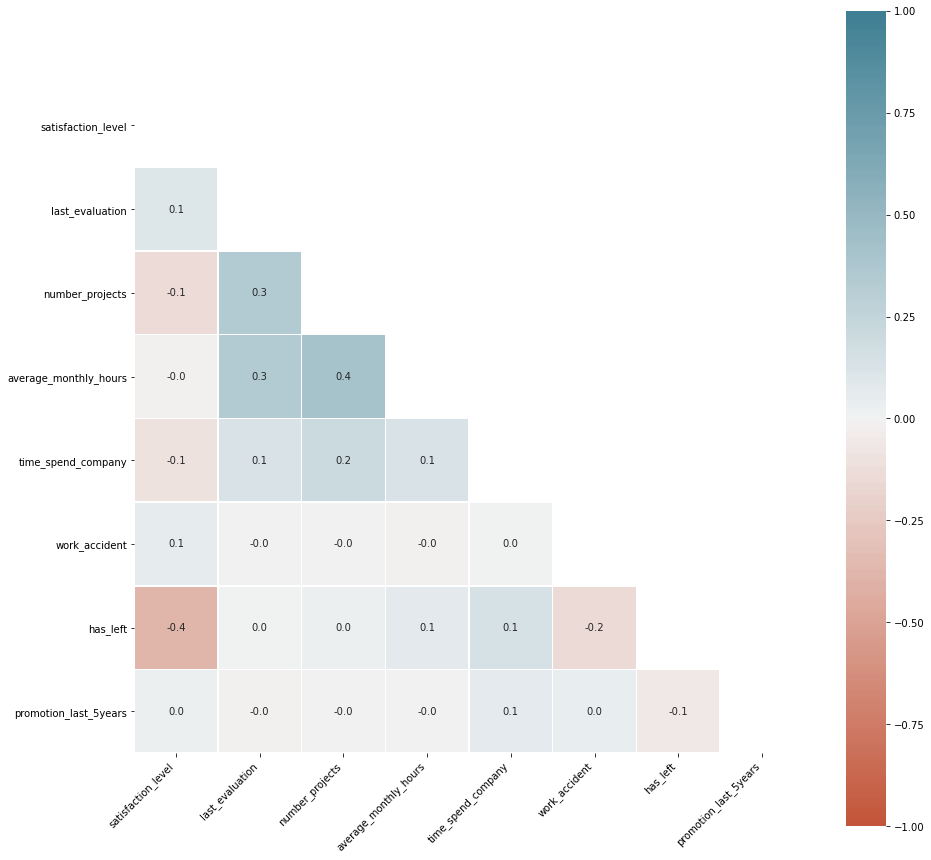

In [13]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    linewidths=.5,
    fmt= '.1f',
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Not enough correlation between features that would allow to drop some of them.

***

# ETL and descriptive analysis

Here we simply transform some of the data types in the data frame and deal with missing values. Then, we use visualization for a descriptive analysis. 

***

## 1. Transformation

In [14]:
df['work_accident'] = df['work_accident'].astype(bool)
df['promotion_last_5years'] = df['promotion_last_5years'].astype(bool)
df['has_left'] = df['has_left'].astype(bool)

Now let's look for missing values.

For the numeric variables, it might be a good idea to use imputation in order to fill the missing values since the number of them is very low. For the categorical features, we will simply ignore those observations.

In [17]:
from numpy import median

int_cols = ['number_projects','time_spend_company']
float_cols = ['satisfaction_level','last_evaluation',
           'average_monthly_hours']
cat_cols = ['work_accident','has_left','promotion_last_5years','department','salary']

for column in int_cols:
    df[column] = df[column].fillna(df[column].median())
    
for column in float_cols:
    df[column] = df[column].fillna(df[column].mean())

df = df.dropna(subset=cat_cols)

In [18]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_projects          0
average_monthly_hours    0
time_spend_company       0
work_accident            0
has_left                 0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## 2. Visualization

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

The first step of the descriptive analysis is to observe the distribution of the target variable *has_left* within the data set.

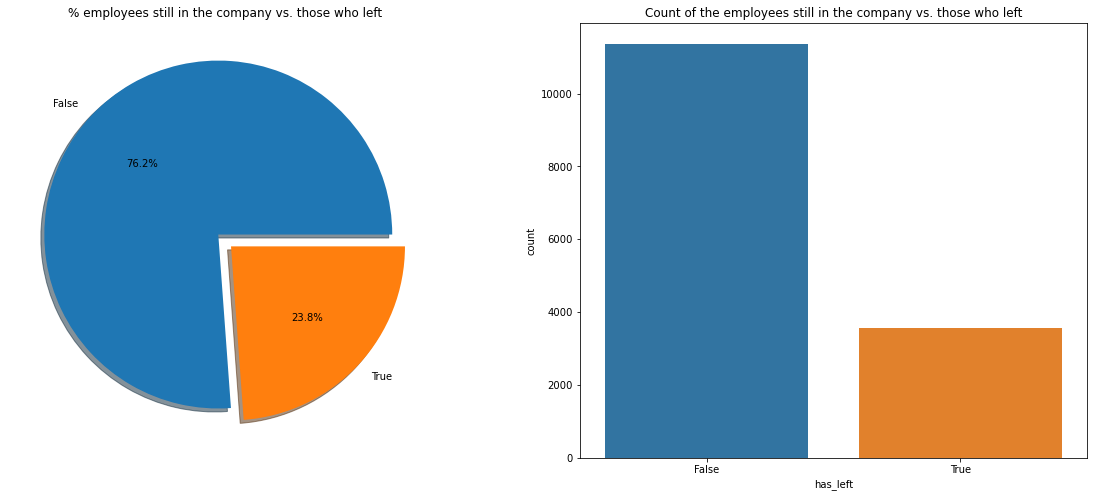

In [20]:
f,ax = plt.subplots(1,2,figsize=(20,8))
df['has_left'].value_counts().plot.pie(explode=[0.05,0.05],
                                       autopct='%1.1f%%',
                                       ax=ax[0],
                                       shadow=True)
ax[0].set_title('% employees still in the company vs. those who left')
ax[0].set_ylabel('')
sns.countplot('has_left', order=df['has_left'].value_counts().index, data=df, ax=ax[1])
ax[1].set_title('Count of the employees still in the company vs. those who left')
plt.show()

It is important to note that there is quite a big **imbalance** in our target variable.

Let's visualize data distribution of continuous features. Usually, prediction model work well if the data distribution is **normal**. So, if our data is skewed, then we may need to normalize it.

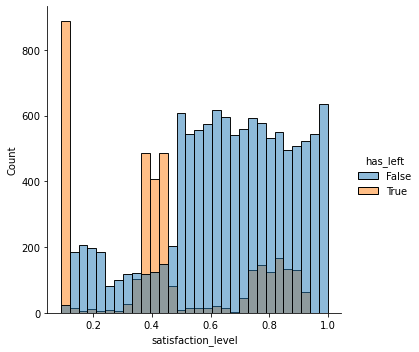

Skewness: -0.477070


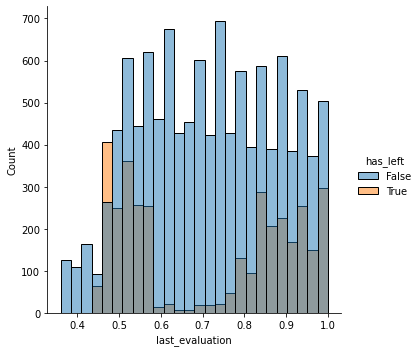

Skewness: -0.027820


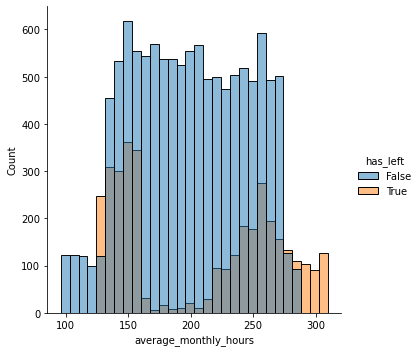

Skewness: 0.052122


In [21]:
columns = ['satisfaction_level','last_evaluation','average_monthly_hours']

for column in columns:
    g = sns.displot(data=df, x=column, hue='has_left')
    plt.show()
    print('Skewness: %f' % df[column].skew())

In [22]:
df_copy = df.copy()

In [23]:
df_copy['has_left_yes'] = df_copy['has_left'].map({True:1, False:0})
df_copy['has_left_no'] = df_copy['has_left'].map({True:0, False:1})

In [24]:
def generate_frequency_graph(df, col_name):
    grp = df.groupby(col_name).agg('sum')[['has_left_yes','has_left_no']]
    grp['percentage'] = grp['has_left_yes'] / (grp['has_left_yes'] + grp['has_left_no']) * 100
    print(grp)
    df.groupby(col_name).agg('sum')[['has_left_no','has_left_yes']].plot(kind='bar')
    plt.xlabel(col_name)
    plt.ylabel('Num. Employees');

                 has_left_yes  has_left_no  percentage
number_projects                                       
2.0                      1557          810   65.779468
3.0                        72         3959    1.786157
4.0                       416         3943    9.543473
5.0                       609         2139   22.161572
6.0                       649          516   55.708155
7.0                       255            0  100.000000
                    has_left_yes  has_left_no  percentage
time_spend_company                                       
2.0                           53         3165    1.646986
3.0                         1583         4846   24.622803
4.0                          885         1656   34.828808
5.0                          828          635   56.596036
6.0                          209          504   29.312763
7.0                            0          188    0.000000
8.0                            0          160    0.000000
10.0                           0      

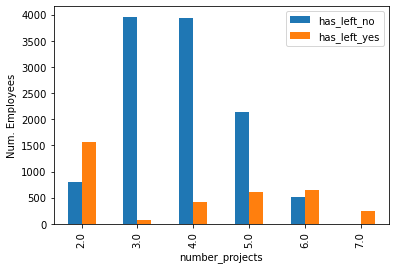

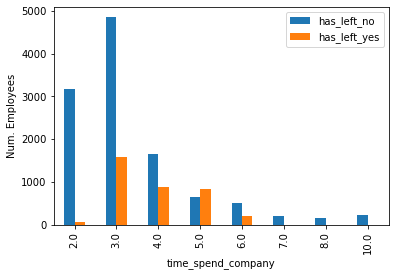

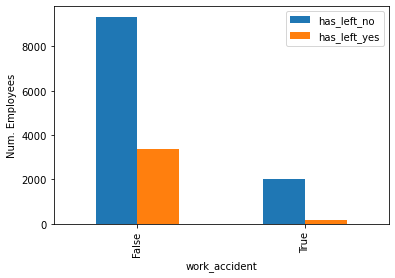

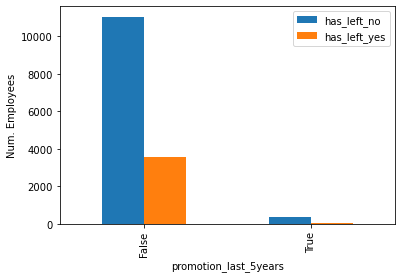

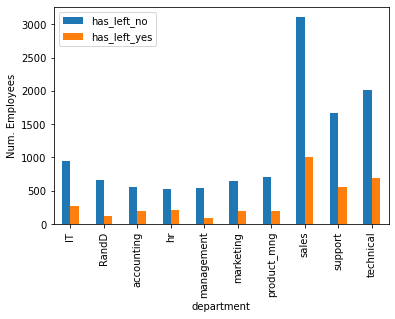

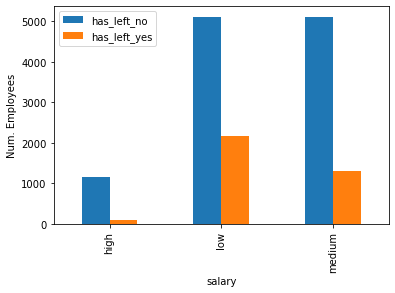

In [25]:
columns = ['number_projects','time_spend_company','work_accident',
           'promotion_last_5years','department','salary']

for column in columns:
    generate_frequency_graph(df_copy, column)

***

# Feature engineering

Next, we scale the *statisfaction*-related variables and encode the categorical variables.

***

In [26]:
from sklearn import preprocessing

def scale(columns):
    df[columns] = preprocessing.MinMaxScaler().fit_transform(df[columns])
    
def encode(columns):
    for column in columns:
        df[column] = df[column].astype('category').cat.codes

In [27]:
satisfaction_columns = ['satisfaction_level','last_evaluation']
scale(satisfaction_columns)
cat_columns = ['work_accident','has_left','promotion_last_5years','department','salary']
encode(cat_columns)

In [28]:
df.head(10)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,has_left,promotion_last_5years,department,salary
0,0.318681,0.265625,2.0,157.0,3.0,0,1,0,7,1
1,0.780220,0.781250,5.0,262.0,6.0,0,1,0,7,2
2,0.021978,0.812500,7.0,272.0,4.0,0,1,0,7,2
3,0.692308,0.796875,5.0,223.0,5.0,0,1,0,7,1
4,0.307692,0.250000,2.0,159.0,3.0,0,1,0,7,1
5,0.351648,0.218750,2.0,153.0,3.0,0,1,0,7,1
6,0.010989,0.640625,6.0,247.0,4.0,0,1,0,7,1
7,0.912088,0.765625,5.0,259.0,5.0,0,1,0,7,1
8,0.879121,1.000000,5.0,224.0,5.0,0,1,0,7,1
9,0.362637,0.265625,2.0,142.0,3.0,0,1,0,7,1


In [29]:
df.shape

(14925, 10)

***

# Model building and validation

Since we have to predict a binary class, we will be using classification models for training & predicting employee churn.

In order to evaluate the performance of the model we will focus on the following parameters:

* Accuracy: Overall, how often is the classifier correct?
* Recall: When it's actually yes, how often does it predict yes?
* Precision: When it predicts yes, how often is it correct?
* F1 Score: This is a weighted average of the true positive rate (recall) and precision.

***

## 1. Feature selection

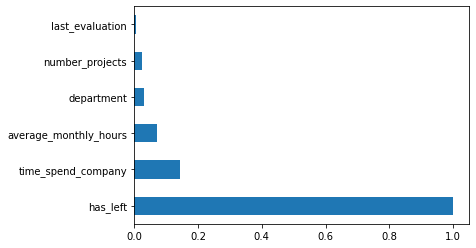

In [30]:
df_corr = df.corr()['has_left'].sort_values(ascending=False).head(6)
top_corr_features = df_corr.index # plot top 5 most correlated features to our target
df_corr.plot(kind='barh')
plt.show()

In [31]:
X = df[['satisfaction_level','last_evaluation','number_projects',
        'average_monthly_hours','time_spend_company','work_accident',
        'promotion_last_5years','department','salary']]  # features
y = df['has_left']  # target

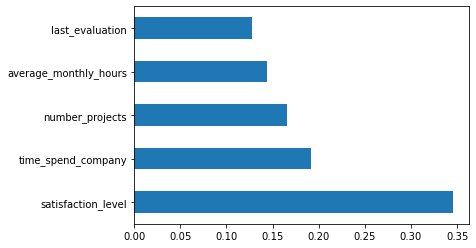

satisfaction_level       0.345550
time_spend_company       0.191181
number_projects          0.165343
average_monthly_hours    0.143779
last_evaluation          0.127635
dtype: float64


In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()
clf_rfc.fit(X, y)
importance = clf_rfc.feature_importances_

feat_importances = pd.Series(clf_rfc.feature_importances_, index=X.columns)
df_imp_feat = feat_importances.nlargest(5)

df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

k = 5

select_features = SelectKBest(f_classif, k=k).fit(X, y)

df_scores = pd.DataFrame(select_features.scores_)
X_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([X_columns, df_scores], axis=1)
feature_scores.columns = ['Feature Name','Score']  # name output columns
print(feature_scores.nlargest(k,'Score'))  # print k best features

            Feature Name        Score
0     satisfaction_level  2655.474556
5          work_accident   366.186936
4     time_spend_company   319.551500
3  average_monthly_hours    76.011820
6  promotion_last_5years    54.527117


## 2. Models

First, split data into training set (70 %) and test set (30 %).

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Random Forest Classifier**

Accuracy: 0.989
Recall: 0.959
Precision: 0.995
F1: 0.977
Feature importances: [0.34350554 0.11892908 0.1644467  0.15762891 0.18752849 0.00579127
 0.00089698 0.01313514 0.0081379 ]


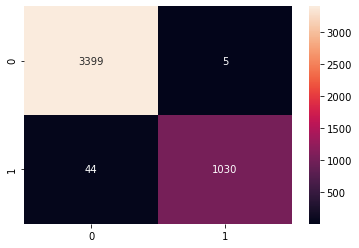

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

clf_rfc = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = clf_rfc.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

print('Feature importances: {}'.format(clf_rfc.feature_importances_))

**Multi-Layer Perceptron Classifier**

Accuracy: 0.914
Recall: 0.810
Precision: 0.828
F1: 0.819


<AxesSubplot:>

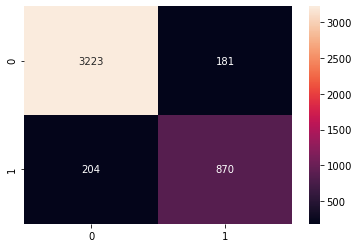

In [36]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(hidden_layer_sizes = [5,5], solver='adam', alpha=0.0001, activation='relu',
                     max_iter = 300, random_state = 42).fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)

print('Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('Recall: {:.3f}'.format(recall_score(y_test, y_pred)))
print('Precision: {:.3f}'.format(precision_score(y_test, y_pred)))
print('F1: {:.3f}'.format(f1_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# Conclusions

* We observe that both models perform reasonably well; using feature selection and after some tweaking and tuning, we might be able to improve them.
* Our goal is to identify the different reasons why certain employees leave. Using our feature selection study, we might conclude that the satisfaction level, the time spent at the company and work accidents influence it the most. However, this would need further analysis.
* Another important goal of the study is to identify those groups that are likely to leave for which the client should make an effort to keep. Using the conclusions of our feature selection, it seems that a target group might be that of employees with 3 to 6 years in the company. This is one of the most *important* features and in that specific range we that over 25% of them leave.